### 1. Domain and Objectives
**Domain** <br>
The resale industry revolves around buying products at low prices then repackaging and reselling these producs at market prices to generate a profit. This business strategy works as domain experts usually have a better idea of how things are priced that the general public. These experts can leverage their knowlege to find products that are undervalued. Resale exists in many industries, from selling bicycles on Facebook Marketplace to hunting down decrepid properties, refurbishing and flipping them. Reselling provides a useful service as many products/cars/homes may be in an undesirable state, but after a cleanup and repackage these can become useful again. Reselling reduces waste as items can be renewed rather than being thrown away. 
<br>

**Project Objectives and Justification** <br>
In this project I am going to create a machine learning regression model that can predict the price of laptops given a list of specs. The market price of a laptop might not be derived from the sum total value of its components. Instead, a laptop's price depends on a combination of different elements, such as the brand, consumer demand as well as technical specifications. A machine learning model is likely able to find relationships between laptop specifications and generate an accurate prediction, given enough training examples.
<br>

**Impact and Contribution** <br>
If the model can provide accurate enough predictions, it can be used in combination with a webscraper to look at hundreds of laptops on the internet and flag ones that may be considered "undervalued". By automating this process, a seller might gain a competitive edge in the resale business as they will have the ability to screen more products than competitors. Machine learning should also be adaptable to selling other items like bicycles, phones and pc components.

<br></br>
<br></br>
<br></br>
### 2. Dataset Description
*Provide a description of the dataset, its size, data types, the way the
data was acquired. State clearly the source of the dataset. Kaggle.com provides a
wide variety of datasets.*


This project will use the "Laptop Price" dataset available on Kaggle: 
[Laptop Price Dataset](https://www.kaggle.com/datasets/muhammetvarl/laptop-price/) <br>
This dataset contains 1302 laptop entries each with their specification listed. The source of the dataset does not specify how the data was aquired, it is likely that the data was scraped from e-commerce websites. Utilising this dataset, my hope is that there are sufficient entries to train an accurate regression model.

Each entry in the dataset has the following attributes:
These attributes cover both physical and technical specifications and should have sufficient predictive power when used in combination.
|Attribute:|laptop_ID|Company|Product|TypeName|Inches|ScreenResolution|Cpu|Ram|Memory|Gpu|OpSys|Weight|Price_euros|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Datatype:|numeric|string|string|string|numeric|string|string|string|string|string|string|numeric|numeric|

<br>
The dataset is not in 1NF as many of the attributes are strings with inconsistent formating. For example:       "screen resolution" may appear in the form: *"Full HD 1920x1080"* or *"1920x1080"*, and the "Memory" column contains compound information about multiple types of storage in a way that is not interpretable. The "Screen Resolution" elements will need to be extracted and encoded as a numerical value in the range (0-1). Similarly, the "Memory" elements are not scalar values, so they will have to be split into separate attributes such as: "ssd storage" and "hdd storage".

<br></br>
<br></br>
<br></br>
### 3. Data preparation (aquisition/cleaning/sanitisation/normalisation)
*Convert/store the dataset locally and preprocess the data. This is usually equivalent
to transforming a table from a database into First Normal Form (1NF). Describe the
preprocessing steps and why they were needed. Describe the file type/format, for
example CSV file. Process the dataset for missing data if needed. For this part use
Pandas DataFrame.*

The dataset is a csv file with 1302 rows and 14 columns. First, I will need to load the csv file into a pandas dataframe and display the first 5 rows.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr   

C:\Users\user-pc\AppData\Local\Temp\ipykernel_16012\4246901852.py:6: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
# load dataset into pandas dataframe
df = pd.read_csv("Laptop_Prices.csv")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


I will drop the columns ***laptop_ID*** and ***TypeName*** as these are not essential.

In [3]:
if ("laptop_ID" in df): df.drop(columns=["laptop_ID"], inplace=True)
if ("TypeName" in df): df.drop(columns=["TypeName"], inplace=True)

To transform the weight column into a usable format, I will extract the numeric part of the ***Weight*** elements.

In [4]:
def Extract_Weight(x):
    return float(x[:-2])

# check if "Weight" column exists
if ("Weight" in df):
    # create column weight
    df["Weight (kg)"] = [""] * len(df["Company"])
    # adapted from https://stackoverflow.com/questions/25292838/applying-regex-to-a-pandas-dataframe
    df["Weight (kg)"] = df["Weight"].apply(lambda x: Extract_Weight(x))
    df.drop(columns=["Weight"], inplace=True) # drop original "Weight" column

I will then ensure that the operating system values are consistent.

In [5]:
# show list of operating system names
# print(df["OpSys"].unique())

def Extract_OS(x):
    os = x
    if x == "Mac Os X":
        os = "MacOS"
    if x == "macOS":
        os = "MacOS"
    if x == "Windows 10 S":
        os = "Windows 10"
    return os

# check if "OpSys" column exists
if ("OpSys" in df):
    df["OS"] = df["OpSys"].apply(lambda x: Extract_OS(x)) # create column OS from cleaned OsSys data
    df.drop(columns=["OpSys"], inplace=True)

The screen resolution values are not in a usable format. To fix it I will split the values into two columns "Resolution Width" and "Resolution Height".

In [6]:
def Extract_Res_Width(x):
    words = x.split(" ") # split words along spaces
    res = words[-1] # get the last word
    resParts = res.split("x") # split the last word along "x"
    return int(resParts[0]) # return the first part of split as integer

def Extract_Res_Height(x):
    words = x.split(" ") # split words along spaces
    res = words[-1] # get the last word
    resParts = res.split("x") # split the last word along "x"
    return int(resParts[-1]) # return the second part of split as integer

# check if "ScreenResolution" column exists
if ("ScreenResolution" in df):
    # create two new columns "resolution width" & "resolution height"
    df["Resolution Width"] = df["ScreenResolution"].apply(lambda x: Extract_Res_Width(x)) # extract resolution width
    df["Resolution Height"] = df["ScreenResolution"].apply(lambda x: Extract_Res_Height(x)) # extract resolution height
    df.drop(columns=["ScreenResolution"], inplace=True) # drop original "ScreenResolution" column


I then turn the RAM attributes into a usable format by extracing the numeric part.

In [7]:
def Extract_RAM(x):
    return int(x[:-2])

# check if "Ram" column exists
if ("Ram" in df): 
    # create column RAM
    df["RAM (GB)"] = df["Ram"].apply(lambda x: Extract_RAM(x))
    df.drop(columns=["Ram"], inplace=True) # drop original "Ram" column

Across all laptops there are 4 different types of storage:
1. HDD Storage
2. SDD Storage
3. Flash Storage
4. hybrid Storage
   
I will add three new columns to the dataframe: ***HDD Storage (GB)***, ***SSD Storage (GB)*** and ***Hybrid Storage (GB)*** (I will combine Flash and SSD storage and HDD and Hybrid). Both columns reflect a storage quantity measured in Gigabytes. 
<br></br>

To extract the values I have two functions: ***Extract_HDD*** and ***Extract_SSD***. Each corresponding function looks through each row of ***Memory*** column and looks for the words "HDD" "SSD" "Flash" and "Hybrid". If these key words are found, the numeric storage values always preceed them. These numeric values are extracted, converted to ***Gigabytes*** if necessary, and placed into the new columns. At the end, I drop the original ***Memory*** column.

In [8]:
def Extract_HDD(x):
    words = x.split(" ")
    total = 0
    i = 0
    for i in range(len(words)):
        if words[i] == "HDD" or words[i] == "Hybrid":
            sWord = words[i-1]
            if sWord[-2:] == "GB":
                total += float(sWord[0:-2])
            else:
                total += float(sWord[0:-2]) * 1000
    return int(total)

def Extract_SSD(x):
    words = x.split(" ")
    total = 0
    i = 0
    for i in range(len(words)):
        if words[i] == "SSD" or words[i] == "Flash":
            sWord = words[i-1]
            if sWord[-2:] == "GB":
                total += float(sWord[0:-2])
            else:
                total += float(sWord[0:-2]) * 1000
    return int(total)


if ("Memory" in df): 
    # create three new columns "SSD storage", "HDD storage" and "Hybrid storage"
    df["HDD Storage (GB)"] = df["Memory"].apply(lambda x: Extract_HDD(x))
    df["SSD Storage (GB)"] = df["Memory"].apply(lambda x: Extract_SSD(x))
    df.drop(columns=["Memory"], inplace=True)

There is a lot of useful information in the "Cpu" column however, this information is concatenated into a string and so violates 1NF. I will parse this information by adding three new columns to the dataframe: ***CPU Manufacturer***, ***CPU*** and ***CPU Clockspeed***. To extract the information, I have 3 functions: 
1. Extract_CPU_Manufacturer : This function takes an input string and returns the manufacturer name that appears in the string
3. Extract_CPU_Name : This function strips away the first and last word in the string then combines all the i7s i5s and i3s together and finally returns the result.
5. Extract_CPU_Clockspeed : This function parses the clockspeed from the input string, converts it to a float and returns the result
  
I am choosing to combine all i7s i5s and i3s together as there are loads of different Intel cpus. Consumers typically care more about which class (i3, i5, i7) an Intel CPU belongs to than the specific model. Combining these will make the graphical visualisations and statistical analysis more managable.
<br></br>
CPU clockspeed gives an indication of the CPU's processing power (in light of the CPU name). The prediction model should find this information useful as more powerful processors demand a higher price.

In [9]:
def Extract_CPU_Manufacturer(x):
    manufacturers = ["Intel", "AMD", "Samsung", "ARM"]
    for m in manufacturers:
        if m in x:
            return m

def Extract_CPU_Name(x):
    words = x.split(" ")
    middleWords = words[1:-1]
    name = None
    if "i3" in middleWords:
        name = "i3"
    elif "i5" in middleWords:
        name = "i5"
    elif "i7" in middleWords:
        name = "i7"
    else:
        name = " ".join(middleWords)
    return name

def Extract_CPU_Clockspeed(x):
    words = x.split(" ")
    return float(words[-1][0:-3])
    
if ("Cpu" in df): 
    # create three new columns "CPU" "CPU manufacturer" & "CPU clockspeed"
    df["CPU Manufacturer"] = df["Cpu"].apply(lambda x: Extract_CPU_Manufacturer(x))
    df["CPU"] = df["Cpu"].apply(lambda x: Extract_CPU_Name(x))
    df["CPU Clockspeed (GHz)"] = df["Cpu"].apply(lambda x: Extract_CPU_Clockspeed(x))
    df.drop(columns=["Cpu"], inplace=True)

I will split the "Gpu" column into two columns:
1. GPU Manufacturer
2. GPU

Splitting this data will prove useful in the data visualisation section of this project.

In [10]:
def Extract_GPU_Manufacturer(x):
    manufacturers = ["Nvidia", "Intel", "AMD", "Samsung", "ARM"]
    for m in manufacturers:
        if m in x:
            return m
        
def Extract_GPU_Name(x):
    words = x.split(" ")
    return " ".join(words[1:])
    
if ("Gpu" in df): 
    # create two new columns "GPU" & "GPU manufacturer" 
    df["GPU Manufacturer"] = df["Gpu"].apply(lambda x: Extract_GPU_Manufacturer(x))
    df["GPU"] = df["Gpu"].apply(lambda x: Extract_GPU_Name(x))
    df.drop(columns=["Gpu"], inplace=True)

Finally, I am renaming the "Price_euros" column and appending it to the end so that all the columns are in a logical order.

In [11]:
if ("Price_euros" in df):
    df["Price (EUR)"] = df["Price_euros"]
    df.drop(columns=["Price_euros"], inplace=True)

df.head(5)

,Company,Product,Inches,Weight (kg),OS,Resolution Width,Resolution Height,RAM (GB),HDD Storage (GB),SSD Storage (GB),CPU Manufacturer,CPU,CPU Clockspeed (GHz),GPU Manufacturer,GPU,Price (EUR)
0,Apple,MacBook Pro,13.3,1.37,MacOS,2560,1600,8,0,128,Intel,i5,2.3,Intel,Iris Plus Graphics 640,1339.69
1,Apple,Macbook Air,13.3,1.34,MacOS,1440,900,8,0,128,Intel,i5,1.8,Intel,HD Graphics 6000,898.94
2,HP,250 G6,15.6,1.86,No OS,1920,1080,8,0,256,Intel,i5,2.5,Intel,HD Graphics 620,575.00
3,Apple,MacBook Pro,15.4,1.83,MacOS,2880,1800,16,0,512,Intel,i7,2.7,AMD,Radeon Pro 455,2537.45
4,Apple,MacBook Pro,13.3,1.37,MacOS,2560,1600,8,0,256,Intel,i5,3.1,Intel,Iris Plus Graphics 650,1803.60


### 4. Statistical analysis
Identify key series of the dataset and provide statistical summary of the data,
including:
- Measures of central tendency
- Measures of spread
- Type of distribution
This can be done by using libraries such as NumPy, pandas and SciPy. Most likely
the dataset will consist of multiple series.

In [12]:
df.describe()

,Inches,Weight (kg),Resolution Width,Resolution Height,RAM (GB),HDD Storage (GB),SSD Storage (GB),CPU Clockspeed (GHz),Price (EUR)
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,2.038734,1894.784344,1070.830391,8.382195,422.615503,188.288565,2.298772,1123.686992
std,1.426304,0.665475,494.641028,284.519410,5.084665,517.032950,184.926513,0.506340,699.009043
min,10.100000,0.690000,1366.000000,768.000000,2.000000,0.000000,0.000000,0.900000,174.000000
25%,14.000000,1.500000,1600.000000,900.000000,4.000000,0.000000,0.000000,2.000000,599.000000
50%,15.600000,2.040000,1920.000000,1080.000000,8.000000,0.000000,256.000000,2.500000,977.000000
75%,15.600000,2.300000,1920.000000,1080.000000,8.000000,1000.000000,256.000000,2.700000,1487.880000
max,18.400000,4.700000,3840.000000,2160.000000,64.000000,2000.000000,1024.000000,3.600000,6099.000000


### 5. Visualisation
Visualise key data series within the dataset by using the appropriate graphs. This
can be done by using Python libraries, such as Matplotlib. Accompany any diagram
with explanations - we will not award any points if you do not. Draw conclusions
based on the diagrams, which otherwise, without visualisation would be difficult or
impossible. Which visualisation (of the ones you prepared) is most important and
why?
6. Build your ML (Machine Learning) model
- Identify the features and the labels which will be used in the data regression
model and justify why they were selected
- Explain their (i.e. features) importance for the process of building the ML
model
- Build the model by using an appropriate Python library, such as Weka or
Scikit-learn
- Run and evaluate your model: does your model fit the data or further pre-processing is required?

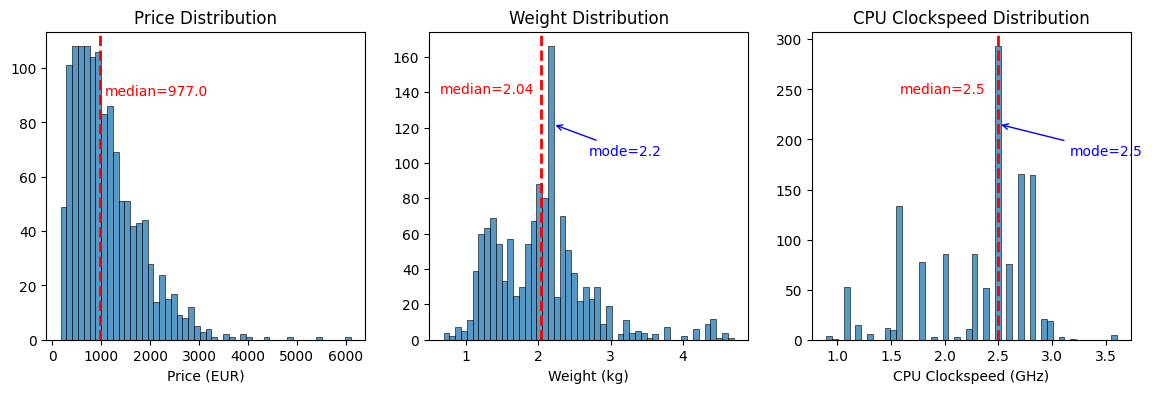

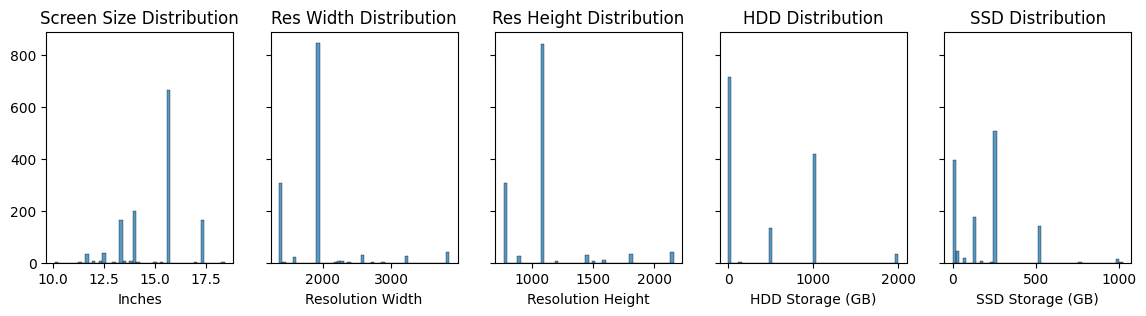

In [13]:
# PRICE, WEIGHT & CLOCKSPEED PLOTS
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.flatten()

# PRICE SUBPLOT
sns.histplot(data=df["Price (EUR)"], ax=axes[0], bins=50).set(title="Price Distribution", ylabel=None) 
median = df["Price (EUR)"].median()
axes[0].axvline(x=median, color='red', ls='--', lw=2.0)
axes[0].annotate('median={}'.format(median), xy=(0,0), xytext=(median + 100, 90), color='red')

# WEIGHT SUBPLOT
sns.histplot(data=df["Weight (kg)"], ax=axes[1], bins=50).set(title="Weight Distribution", ylabel=None) 
median = df["Weight (kg)"].median()
mode = df["Weight (kg)"].mode().iloc[0]
axes[1].axvline(x=median, color='red', ls='--', lw=2.0)
axes[1].annotate('median={}'.format(median),  xy=(median -1.4, axes[1].get_ylim()[1] * 0.8), color='red')
axes[1].annotate('mode={}'.format(mode),  xy=(mode, axes[1].get_ylim()[1] * 0.7),  
                 xytext=(mode + 1, axes[1].get_ylim()[1] * 0.6), 
                 arrowprops=dict(arrowstyle="->", color='blue'),
                 fontsize=10, color='blue', ha='center')

# CPU CLOCKSPEED SUBPLOT
sns.histplot(data=df["CPU Clockspeed (GHz)"], ax=axes[2], bins=50).set(title="CPU Clockspeed Distribution", ylabel=None) 
median = df["CPU Clockspeed (GHz)"].median()
mode = df["CPU Clockspeed (GHz)"].mode().iloc[0]
axes[2].axvline(x=median, color='red', ls='--', lw=2.0)
axes[2].annotate('median={}'.format(median),  xy=(median -0.92, axes[2].get_ylim()[1] * 0.8), color='red')
axes[2].annotate('mode={}'.format(mode),  xy=(mode, axes[2].get_ylim()[1] * 0.7),  
                 xytext=(mode + 1, axes[2].get_ylim()[1] * 0.6), 
                 arrowprops=dict(arrowstyle="->", color='blue'),
                 fontsize=10, color='blue', ha='center')
plt.show()

# PLOT DISCRETE DISTRIBUTIONS
fig, axes = plt.subplots(1, 5, figsize=(14, 3), sharey=True)
axes = axes.flatten()
sns.histplot(data=df["Inches"], ax=axes[0], bins=50).set(title="Screen Size Distribution", ylabel=None) 
sns.histplot(data=df["Resolution Width"], ax=axes[1], bins=50).set(title="Res Width Distribution", ylabel=None) 
sns.histplot(data=df["Resolution Height"], ax=axes[2], bins=50).set(title="Res Height Distribution", ylabel=None) 
sns.histplot(data=df["HDD Storage (GB)"], ax=axes[3], bins=50).set(title="HDD Distribution", ylabel=None) 
sns.histplot(data=df["SSD Storage (GB)"], ax=axes[4], bins=50).set(title="SSD Distribution", ylabel=None) 
plt.subplots_adjust(hspace=0.4)

### Observations
The median laptop price is just under €1000. At this price point it appears that there is a sharp decline in the number of laptops. This would suggest that €1000 mark is a psychological price barrier. From a consumer's perspective, €1000 might be the upper limit of their laptop budget.
<br></br>
The weight distribution chart shows an interesting pattern, indicating two main camps of laptop sizes. The distribution of laptop weights appears to form two peaks in the ***(1kg - 1.5kg)*** and ***(1.7kg - 2.25kg)*** ranges, with a large number of laptops weighing 2.2kg. Interestingly a similary large peak is shown in the distribution of screen sizes. To reconcile this data coincidence, I will look at laptops in the ~2.2kg weight range.

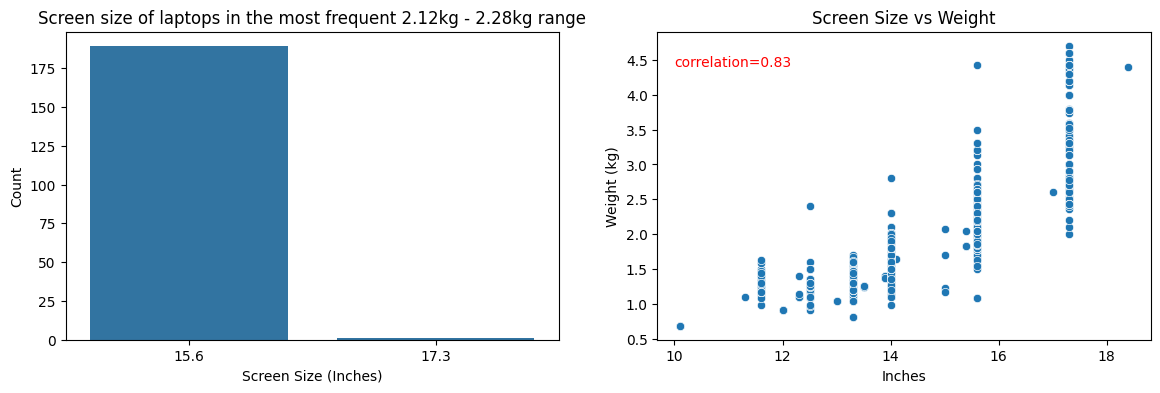

In [19]:
binWidth = (df["Weight (kg)"].max() - df["Weight (kg)"].min()) / 50
mode = df["Weight (kg)"].mode().iloc[0]
laptops_2_2 = df[(df["Weight (kg)"] >= mode - binWidth) & (df["Weight (kg)"] < mode + binWidth)]
counts = laptops_2_2["Inches"].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(x=[15.6, 17.3], y=counts, ax=axes[0]).set(
    title=f'Screen size of laptops in the most frequent {round(mode - binWidth, 2)}kg - {round(mode + binWidth, 2)}kg range')
axes[0].set_xlabel("Screen Size (Inches)")
axes[0].set_ylabel("Count")

sns.scatterplot(x=df["Inches"], y=df["Weight (kg)"], ax=axes[1]).set(title='Screen Size vs Weight')
correlation = round(pearsonr(df["Inches"], df["Weight (kg)"])[0], 2)
axes[1].annotate('correlation={}'.format(correlation),  xy=(10, axes[1].get_ylim()[1] * 0.9), color='red')
plt.show()

It is clear that 15.6 inch screens are the most common. Logically screen size is a major contributor to laptop weight as a larger frame is requred to acompany a larger screen. The scatter plot (right) shows a clear relationship between screen size and weight. The correlation between screen size and weight is 8.6 which is fairly high.

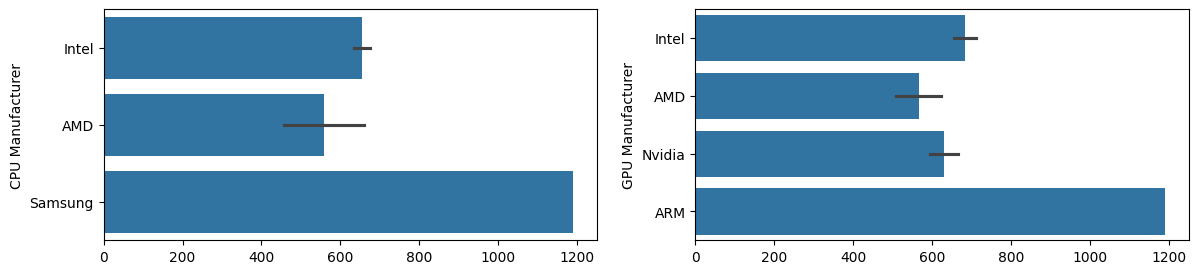

In [15]:
# PLOT CPU & GPU MANUFACTURERS
fig, axes = plt.subplots(1, 2, figsize=(14, 3))
sns.barplot(df["CPU Manufacturer"], ax=axes[0])
sns.barplot(df["GPU Manufacturer"], ax=axes[1])
plt.show()

### 5.2 What is a predictor of price?

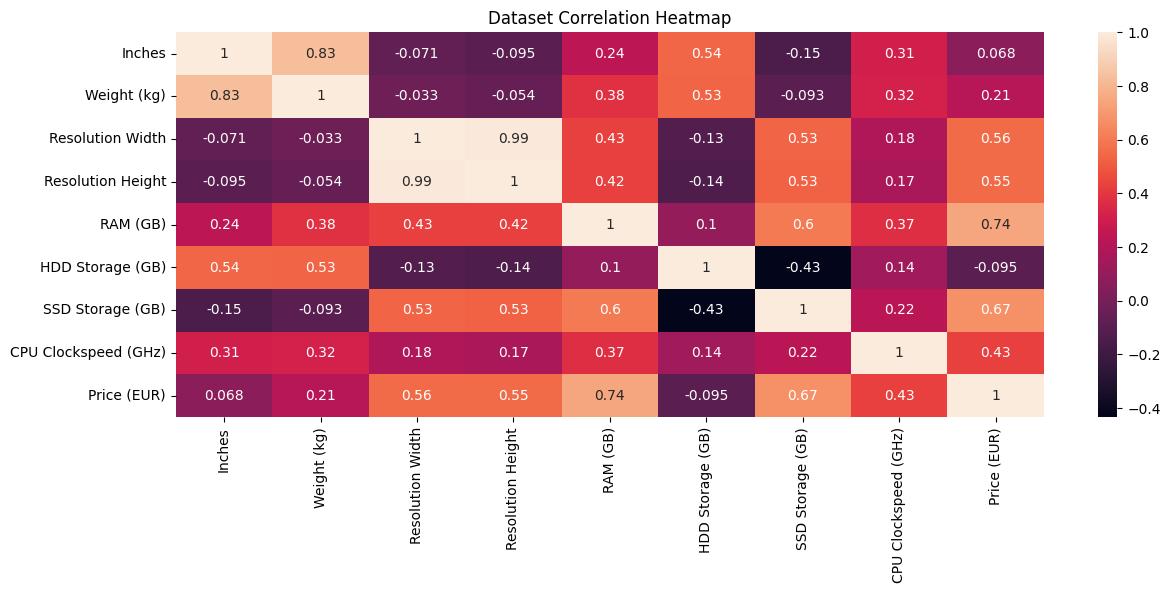

In [16]:
# from https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
fig, axes = plt.subplots(1, figsize=(14, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True).set(title="Dataset Correlation Heatmap")
plt.show()

Above is a correlation heatmap giving some indication of what data points are related to the laptop's price. The notable values are:
1. RAM (correlation = 0.74)
2. SSD Storage (correlation = 0.67)
3. Resolution Width (correlation = 0.56)
4. Resolution Height (correlation = 0.55)
<br>

Higher end laptops typically feature more RAM, a higher resolution display and more SSD storage. Interestingly, HDD storage is slightly negatively correlated to laptop price. Hard drives are much slower than SSDs and are typically included as aditional bulk storage in higher end laptops while remaining the dominant storage medium in lower-end laptops. Therefore across the complete range of laptops, there is almost no link between HDD space and laptop price. It is possible that in some subsets of the dataset, HDD space positively correlatied to price and in other subsets, it may be negatively correlated. In other words, HDD space likely has a more nuanced relationship to price.
<br></br>
CPU clockspeed is in part positively correlated with price. This correlation is not high because although higher clockspeeds are typically features of more powerful and thus more expesive CPUs, some high end CPUs like the Xeon series (typically found in workstations and servers) have lower clockspeeds and higher core counts, optimising for power efficiency.



### 7. Validation
Consider how the model’s results could be validated using either cross validation or
other models/ensembles.

### 8. Feature engineering
Your model would benefit from using feature engineering techniques or polynomial
features as described in Topic 5.4. Implement these techniques and re-evaluate your
model.

Aditional features can be generated from the CPU and GPU attributes of the dataset. For the CPU attribute, aditional features include: core count, thread count, base frequency and  turbo requency. For the GPU attribute, additional features include: core count, VRAM.

### 9. Programming style
The Python code is expected to meet certain standards as described by most coding
conventions. This includes code indentation, not using unnamed numerical
constants, assigning meaningful names to variables and subroutines. Additionally,
the code is expected to be commented, including all variables, sub-routines and calls
to library methods.

### 10. Evaluation of your model (200 to 400 words)
Evaluate the results of the machine learning model:
- Numerically evaluate the performance of the model
- Justify the use of an appropriate measure such as RMSE
- Provide a reflective evaluation of the developed project considering the
obtained results
- Describe its contributions to the selected domain-specific area
- Discuss whether the solution is transferable to other domain-specific areas